# 

<center> <h1 style="background-color:black;color:white;font-weight:30px;padding:20px"> Analysis of games</h1></center>

[Contents]()<a id="10"></a>

1. [Importing Necessary Libraries](#1)
2. [Loading the Datasets](#2)
3. [Basic information and Statistical Analysis](#3)
4. [Data Visualtization](#4)
    1. [Rating of different games](#4a)
5. [Data Tranformation](#5)
6. [Builing Model](#6)
7. [Testing](#7)
8. [Summary and Conclusion](#8)
9. [References](#9)

# [Importing necessary Libraries]()<a id="1"></a> 
[back to content list](#10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe

# [Loading the Dataset]()<a id="2"></a> 
[back to content list](#10)

In [2]:
df=pd.read_csv('games.csv')
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


# [Basic Information and Statistical Analysis]()<a id="3"></a> 
[back to content list](#10)

In [3]:
df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [4]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [6]:
df.duplicated().unique()

array([False])

## Summary:
The initial analysis reaveled that the dataset contains 50872 entries accross a total of 13 columns. The Dataset does not contain any null values and any duplicated entries. There are four different kinds of data in the set, which include int64, float64, object and bool type. Its easier to work on the string type of data rather than object type and int64 type rather than bool type. So I will be converting the specific columns into the desired type of column values.

### Convertion of dtypes

#### 1. Object type to string type

In [7]:
object_columns = df.select_dtypes(include = 'object').columns
df[object_columns]=df[object_columns].astype('string')
df.dtypes.value_counts()

bool       4
int64      3
string     3
float64    3
dtype: int64

#### 2. date column to pandas datetime

In [8]:
df['date_release']= pd.to_datetime(df['date_release'])
df.dtypes.value_counts()

bool              4
int64             3
float64           3
string            2
datetime64[ns]    1
dtype: int64

# [Data Visualization]()<a id="2"></a>

## [1. Rating of Different games]()<a id="4a"></a>

[back to content list](#10)

In [9]:
df['rating'].unique()

<StringArray>
[          'Very Positive',                'Positive',
                   'Mixed',         'Mostly Positive',
 'Overwhelmingly Positive',                'Negative',
         'Mostly Negative', 'Overwhelmingly Negative',
           'Very Negative']
Length: 9, dtype: string

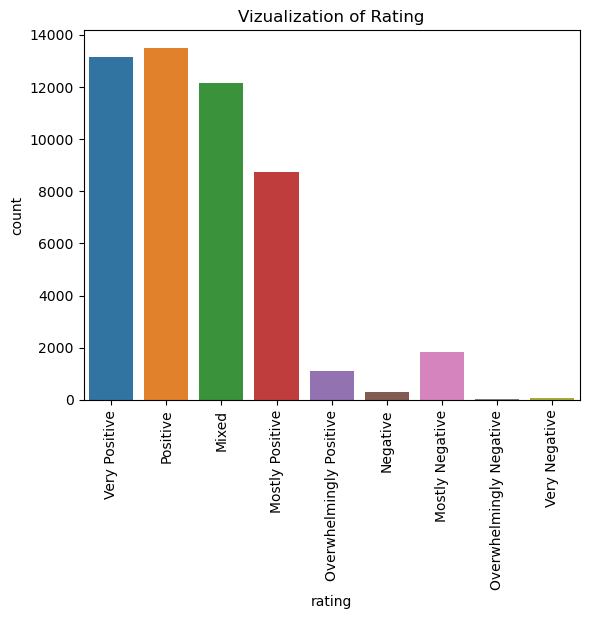

In [10]:
plt.title('Vizualization of Rating')
sns.countplot(x=df['rating'])
plt.xticks(rotation=90);

# [Top Positively rated games]()<a id="4b"></a> 
[back to content list](#10)

In [11]:
df['positive_ratio'].unique()

array([ 84,  85,  92,  61,  88,  90,  75,  94,  70,  91,  77,  95,  73,
        89,  93,  71,  82, 100,  80,  86,  58,  87,  52,  57,  83,  96,
        68,  56,  76,  74,  62,  47,  55,  78,  81,  72,  44,  97,  50,
        67,  66,  60,  53,  64,  98,  63,  48,  69,  59,  79,  51,  65,
        43,  46,  99,  45,  41,  40,  54,  10,  42,  38,  39,  25,  30,
        15,  21,  34,  49,  37,  33,  36,  27,  19,  32,  29,  17,  26,
        20,  12,  31,   9,  24,   5,  23,  35,   6,  14,  28,   7,   2,
        16,  13,  11,  22,   0,  18,   8,   4,   3], dtype=int64)

The highly positive ratio has 100, 97, 92, 90,94, 91,93,96 numbers. Positive rating includes both positive and very positive ratings. I will take the least positive rating, i.e., 90 in order to get all the positive rated games. 

In [12]:
df=df.sort_values(by='positive_ratio', ascending=False)
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
26853,1001100,Kooring VR Wonderland:Mecadino's Attack,2020-10-09,True,False,False,Positive,100,10,15.99,15.99,0.0,True
46269,2251540,IBIS AM,2023-02-17,True,True,True,Positive,100,18,1.99,1.99,0.0,True
9752,2098090,Lost Lands: Sand Captivity,2022-12-09,True,False,False,Positive,100,25,6.99,6.99,0.0,True
35761,1242747,Monster Hunter World: Iceborne - Hairstyle: Th...,2020-11-11,True,False,False,Positive,100,14,0.00,0.00,0.0,True
35759,1218960,初恋日记 - 无损音乐包,2020-01-08,False,False,False,Positive,100,17,3.99,3.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38581,1589890,便利商店‪6,2021-06-14,True,True,False,Negative,0,10,12.99,12.99,0.0,True
38100,2008010,Succubus Dating,2022-06-15,True,False,False,Negative,0,11,1.39,1.99,30.0,True
21778,1717658,Train Simulator: CSX SD45-2 Loco Add-On,2021-12-09,True,False,False,Negative,0,10,19.99,19.99,0.0,True
47193,1304100,The Adventures of Fatman: Intergalactic Indige...,2020-05-15,True,False,False,Negative,0,10,0.27,0.99,72.0,True


In [53]:
top_positively_rated_games=df[(df['positive_ratio']>=80)].sort_values(by=['user_reviews', 'positive_ratio'], ascending=[False, True])

In [54]:
top_positively_rated_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.00,0.00,0.0,True
13176,570,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.00,0.00,0.0,True
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.00,0.00,0.0,True
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,86,993312,20.00,0.00,0.0,True
47380,440,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11922,815410,The Art of Shelter,2018-05-09,True,True,True,Positive,100,10,8.99,8.99,0.0,True
11750,2012630,A Pact With Me - Boys Love (BL) Visual Novel,2022-07-16,True,True,True,Positive,100,10,4.99,4.99,0.0,True
31622,1843610,RetroArch - Beetle PCE,2021-12-08,True,False,True,Positive,100,10,0.00,0.00,0.0,True
1960,1771540,ZenVR,2021-12-13,True,False,False,Positive,100,10,19.99,19.99,0.0,True


### The Top 10 positively rated games

In [55]:
top_10_positively_rated_games=top_positively_rated_games[(top_positively_rated_games['positive_ratio']>=100) & df['rating'].isin(['Overwhelmingly Positive','Very Positive', 'Positive'])].sort_values(by=['positive_ratio'], ascending=[True])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3160\3855697157.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [56]:
len(top_10_positively_rated_games)

3635

In [57]:
top_10_positively_rated_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2287,2206340,Aokana - Four Rhythms Across the Blue - EXTRA2,2022-12-16,True,False,False,Overwhelmingly Positive,100,530,24.99,24.99,0.0,True
44065,1566340,DARK AROUND YOU,2021-03-31,True,False,False,Positive,100,12,4.99,4.99,0.0,True
38935,1397000,Zodiac DX,2021-07-15,True,False,False,Positive,100,12,2.99,2.99,0.0,True
38102,2098280,The Perfect Garden,2022-08-16,True,False,False,Positive,100,12,4.49,44.99,90.0,True
16735,974301,Monster Hunter: World - Gesture: Cool Dance,2018-11-29,True,False,False,Positive,100,12,1.99,1.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,1563780,BOK-BOK: A Chicken Dating Sim,2021-03-13,True,False,False,Positive,100,17,0.28,0.99,71.0,True
4629,1415510,Holdfast: Nations At War - High Command,2020-09-09,True,False,False,Positive,100,17,6.99,6.99,0.0,True
36730,1586620,Robot.Start - Puzzle Game,2021-04-26,True,False,False,Positive,100,17,0.99,0.99,0.0,True
27832,1994440,Egglien,2022-08-05,True,False,False,Positive,100,18,4.99,4.99,0.0,True


In [58]:
import plotly.express as px
fig= px.bar(top_10_positively_rated_games.head(10),x= 'title', y='price_final', title= 'Top 10 positive rated games on Steam', hover_name="title", hover_data={'title': False, 'date_release': True, 'user_reviews': True, 'positive_ratio': True}, labels={"title":"Title", "date_release":"Release Date", "price_final":"Price","positive_ratio": "Positive Ratio","user_reviews":"Total User Reviews"})
fig.update_yaxes(title_text='Price of game ($)')
fig.update_xaxes(title_text='Game Title')
fig.show()

## Top Negatively rated games

In [59]:
df['rating'].unique()

<StringArray>
[               'Positive',           'Very Positive',
 'Overwhelmingly Positive',         'Mostly Positive',
                   'Mixed',         'Mostly Negative',
           'Very Negative',                'Negative',
 'Overwhelmingly Negative']
Length: 9, dtype: string

In [60]:
df.positive_ratio.unique()

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   0], dtype=int64)

In [61]:
negatively_rated_games=df[(df['positive_ratio']<=50)].sort_values(by=['user_reviews', 'positive_ratio'], ascending=[False, True])
negatively_rated_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
14286,2357570,Overwatch® 2,2023-08-10,True,False,False,Overwhelmingly Negative,9,181198,0.00,0.00,0.0,True
13496,1517290,Battlefield™ 2042,2021-11-19,True,False,False,Mixed,40,153151,60.00,0.00,0.0,True
37509,1832640,Mirror 2: Project X,2022-01-20,True,False,False,Mostly Negative,26,110981,1.99,1.99,0.0,True
48874,1665460,eFootball™ 2024,2021-09-29,True,False,False,Mostly Negative,37,59071,0.00,0.00,0.0,True
18607,834910,ATLAS,2018-12-22,True,False,False,Mixed,46,35736,29.99,29.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46173,1638400,FINAL FANTASY V: OST & Wallpaper,2021-11-10,True,False,False,Mixed,50,10,0.00,0.00,0.0,True
43684,1183510,Little Town Hero,2020-07-09,True,False,False,Mixed,50,10,24.99,24.99,0.0,True
27958,340560,Wanted Corp.,2016-12-08,True,False,False,Mixed,50,10,11.99,11.99,0.0,True
37734,2177060,The Lost Village,2022-10-12,True,False,False,Mixed,50,10,2.99,2.99,0.0,True


## Top 10 negatively rated games

In [68]:
top_10_negatively_rated_games=negatively_rated_games[(negatively_rated_games['positive_ratio']<=20) & negatively_rated_games['rating'].isin(['Overwhelmingly Negative','Very Negative', 'Negative'])].sort_values(by=['positive_ratio'], ascending=[True]).head(10)
top_10_negatively_rated_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
38808,1390650,SimpleProject,2021-04-13,True,False,False,Negative,0,11,0.99,0.99,0.0,True
38205,1374740,Isolated Life,2020-08-26,True,False,False,Negative,0,10,9.99,9.99,0.0,True
46308,2098860,Magic Сity Detective: Secret Desire Collector'...,2022-08-09,True,False,False,Negative,0,10,9.99,9.99,0.0,True
43188,1007970,This Side (Early Access Game),2019-05-15,True,False,False,Negative,0,10,9.99,9.99,0.0,True
38581,1589890,便利商店‪6,2021-06-14,True,True,False,Negative,0,10,12.99,12.99,0.0,True
21778,1717658,Train Simulator: CSX SD45-2 Loco Add-On,2021-12-09,True,False,False,Negative,0,10,19.99,19.99,0.0,True
47193,1304100,The Adventures of Fatman: Intergalactic Indige...,2020-05-15,True,False,False,Negative,0,10,0.27,0.99,72.0,True
50683,321390,Zone 22,2015-07-31,True,False,False,Negative,0,10,7.99,7.99,0.0,True
44953,1312740,Schlag den Star - Das 2. Spiel,2020-10-29,True,False,False,Negative,0,10,19.99,19.99,0.0,True
34999,501060,C.S.S. CITADEL VR,2016-07-15,True,False,False,Negative,0,10,7.99,7.99,0.0,True


In [69]:
fig= px.bar(top_10_negatively_rated_games.head(10),x= 'title', y='price_final', title= 'Top 10 negatively rated games on Steam', hover_name="title", hover_data={'title': False, 'date_release': True, 'user_reviews': True, 'positive_ratio': True}, labels={"title":"Title", "date_release":"Release Date", "price_final":"Price","positive_ratio": "Positive Ratio","user_reviews":"Total User Reviews"})
fig.update_yaxes(title_text='Price of game ($)')
fig.update_xaxes(title_text='Game Title')
fig.show()

## Average rated games

In [71]:
average_rated_games=df[(df['positive_ratio']>50) & (df['positive_ratio']<80)].sort_values(by=['user_reviews', 'positive_ratio'], ascending=[False, True])
average_rated_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
47770,578080,PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,Mixed,57,2217226,0.00,0.00,0.0,True
15358,1938090,Call of Duty®,2022-10-27,True,False,False,Mixed,59,429206,0.00,0.00,0.0,True
47547,236390,War Thunder,2013-08-15,True,True,True,Mostly Positive,75,393681,0.00,0.00,0.0,True
13803,221100,DayZ,2018-12-13,True,False,False,Mostly Positive,74,296845,45.00,0.00,0.0,True
12689,1063730,New World,2021-09-28,True,False,False,Mostly Positive,70,222345,40.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35276,814570,The Great Escape,2018-04-13,True,False,False,Mostly Positive,70,10,3.99,3.99,0.0,True
32063,1502950,Quarantine: Global Pandemic,2021-01-13,True,False,False,Mostly Positive,70,10,3.99,3.99,0.0,True
42716,1174830,The Magician's Workshop,2019-12-19,True,True,True,Mostly Positive,70,10,5.99,5.99,0.0,True
50677,945690,CardLife: Soundtrack,2018-10-09,False,False,False,Mostly Positive,70,10,0.00,0.00,0.0,True


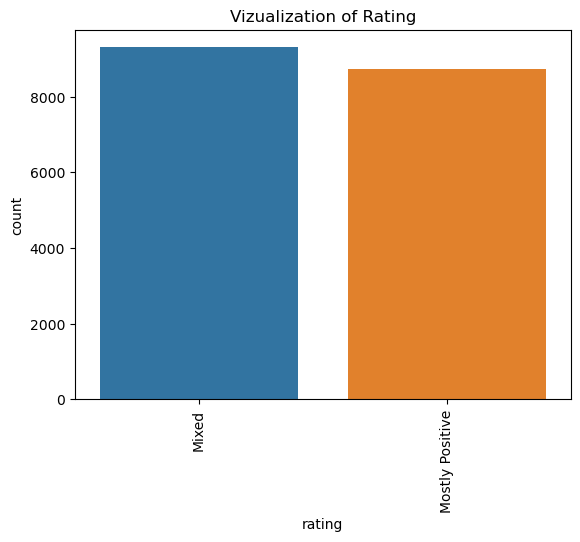

In [72]:
plt.title('Vizualization of Rating')
sns.countplot(x=average_rated_games['rating'])
plt.xticks(rotation=90);

In [73]:
average_rated_games['rating'].unique()

<StringArray>
['Mixed', 'Mostly Positive']
Length: 2, dtype: string

## Price variation of games in different OS